# Telecom Customer Churn and Revenue Prediction using Python
## Task and Goal
### The goal of this project is to create an application for the use of the marketing / product development and sales teams of a telecommunication company. This application uses customer churn data and returns graphs and figures with insights that can lead to developments of products and a marketing plan aimed towards customers that are likely to stay with the company for longer. It can also be used to develop a sales strategy that helps customers choose products appropriate for them, so they do not become unhappy with their service and leave.
## What is Customer Churn?
### Customer churn is the rate at which customers decide to stop doing business with a company. For a telecommunications company, churn would be the rate at which subscribers drop their services and leave for a competitor. It is an important metric in business, especially in the telecommunications industry, since it is more expensive to sign on new customers rather than retaining current ones given marketing budgets aimed towards non-customers. An analysis and continuous monitoring of customer churn can help companies pinpoint weaknesses and strengths in the customer attrition strategy. An analysis of who is more likely to leave can also help generate creative solutions for customized services and service packages.


Use the  dataset to recognize the features to build a ML model that can predict
whether a customer is going to churn out or remain in the company.
Also, if the customer remains with the company then build a model to predict the
possible revenue that company can generate from them

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset

df = pd.read_csv('project2.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


customerID: A unique identifier for each customer, which helps distinguish one customer from another.

gender: The gender of the customer, indicating whether the customer is male or female.

SeniorCitizen: A binary indicator of whether the customer is a senior citizen. A value of 1 typically represents that the customer is a senior citizen, while 0 means they are not.

Partner: Indicates whether the customer has a partner (e.g., spouse or significant other). It can be "Yes" if they have a partner or "No" if they don't.

Dependents: Indicates whether the customer has dependents, such as children or other individuals they support financially. It can be "Yes" if they have dependents or "No" if they don't.

tenure: The number of months that the customer has been a subscriber of the telecommunications company.

PhoneService: Indicates whether the customer has subscribed to phone service. It can be "Yes" if they have phone service or "No" if they don't.

MultipleLines: Indicates whether the customer has multiple phone lines. It can be "Yes" if they have multiple lines, "No" if they have a single line, or "No phone service" if they don't have phone service at all.

InternetService: Indicates the type of internet service the customer uses. It can be "DSL" for digital subscriber line, "Fiber optic" for high-speed fiber optic internet, or "No" if they don't have internet service.

OnlineSecurity: Indicates whether the customer has subscribed to online security services to protect their internet usage. It can be "Yes" if they have online security, "No" if they don't, or "No internet service" if they don't have internet service.

OnlineBackup: Indicates whether the customer has subscribed to online backup services to back up their data. It can be "Yes" if they have online backup, "No" if they don't, or "No internet service" if they don't have internet service.

DeviceProtection: Indicates whether the customer has subscribed to device protection services. It can be "Yes" if they have device protection, "No" if they don't, or "No internet service" if they don't have internet service.

TechSupport: Indicates whether the customer has subscribed to technical support services. It can be "Yes" if they have tech support, "No" if they don't, or "No internet service" if they don't have internet service.

StreamingTV: Indicates whether the customer uses streaming TV services. It can be "Yes" if they use streaming TV, "No" if they don't, or "No internet service" if they don't have internet service.

StreamingMovies: Indicates whether the customer uses streaming movie services. It can be "Yes" if they use streaming movies, "No" if they don't, or "No internet service" if they don't have internet service.

Contract: Specifies the type of contract the customer has. It can be "Month-to-month" for a monthly contract, "One year" for a one-year contract, or "Two year" for a two-year contract.

PaperlessBilling: Indicates whether the customer has opted for paperless billing. It can be "Yes" if they have opted for paperless billing or "No" if they haven't.

PaymentMethod: Specifies the method the customer uses to make payments for the services.

MonthlyCharges: The amount the customer pays each month for their services.

TotalCharges: The total amount charged to the customer over their entire tenure.

Churn: Indicates whether the customer has churned, which means they have canceled their services. It can be "Yes" if they have churned or "No" if they haven't.

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns  #returns the total columns in the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()  #provides the meta data info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from the above information we have seen that all the columns are object type except tenure, SeniorCitizen, MonthlyCharges
so we need to convert all the categorical value in the numericals for LinearRegression Model.


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#coverting the categorical values, Male -> 1, Female -> 0
df['gender'].replace({'Male' : 1, 'Female': 0}, inplace=True)

In [8]:
dict = {'Yes' : 1, 'No': 0}

In [9]:
df['Partner'].replace(dict, inplace=True)

In [10]:
df['Dependents'].replace(dict, inplace=True)

In [11]:
df['PhoneService'].replace(dict, inplace=True)

In [12]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
dict1 = {'Yes' : 1, 'No': 0, 'No internet service':2}

In [14]:
df['OnlineSecurity'].replace(dict1, inplace=True)
# df['OnlineSecurity'].unique()

In [15]:
df['OnlineBackup'].replace(dict1, inplace=True)
# df['OnlineBackup'].unique()

In [16]:
df['DeviceProtection'].replace(dict1, inplace=True)
# df['DeviceProtection'].unique()

In [17]:
df['TechSupport'].replace(dict1, inplace=True)

In [18]:
df['StreamingTV'].replace(dict1, inplace=True)

In [19]:
df['StreamingMovies'].replace(dict1, inplace=True)

In [20]:
df['PaperlessBilling'].replace(dict, inplace=True)

In [21]:
df["MultipleLines"].unique()  #get the unique values of the MultipleLines Col.

array(['No phone service', 'No', 'Yes'], dtype=object)

In [22]:
df['MultipleLines'].replace({'Yes' : 1, 'No': 0, 'No phone service':2}, inplace=True)

In [23]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [24]:
df['Contract'].replace({'Month-to-month' : 0, 'One year': 1, 'Two year':2}, inplace=True)

In [25]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
x=list(pd.unique(df['PaymentMethod']))

code={}
p=0
for i in x:
    code[i]=p
    p+=1
    
def coder(y):
    return code[y]

df['PaymentMethod']=df['PaymentMethod'].apply(coder)

In [27]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [28]:
x=list(pd.unique(df['InternetService']))

code={}
p=0
for i in x:
    code[i]=p
    p+=1
    
def coder(y):
    return code[y]

df['InternetService']=df['InternetService'].apply(coder)

In [29]:
df['Churn'].replace(dict, inplace=True)

In [30]:
#convert the object type into the float type and and values are matching with any char simply replaced with NaN values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [32]:
df.drop('customerID', axis=1, inplace=True)

In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [35]:
# Calculate correlations
correlations = df.corr()['Churn'].drop('Churn')

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

print(sorted_correlations)


Contract            0.396150
tenure              0.354049
OnlineSecurity      0.332443
TechSupport         0.329474
OnlineBackup        0.291047
DeviceProtection    0.281048
PaymentMethod       0.262918
StreamingMovies     0.207150
StreamingTV         0.205246
TotalCharges        0.199484
MonthlyCharges      0.192858
PaperlessBilling    0.191454
Dependents          0.163128
SeniorCitizen       0.150541
Partner             0.149982
InternetService     0.047097
MultipleLines       0.019609
PhoneService        0.011691
gender              0.008545
Name: Churn, dtype: float64


the top factors that seem to have a stronger influence on churn are:

Contract: This has the highest positive correlation with churn, indicating that customers with a shorter contract length (e.g., month-to-month) are more likely to churn.

tenure: Customers with shorter tenure have a higher likelihood of churning.

OnlineSecurity and TechSupport: Customers without these services are more likely to churn.

OnlineBackup, DeviceProtection, and StreamingMovies: Similar to security and tech support, customers without these services are more likely to churn.

PaymentMethod: The choice of payment method seems to have a notable impact on churn.

StreamingTV: Customers without streaming TV services are slightly more likely to churn.

TotalCharges and MonthlyCharges: Higher charges seem to have a weak correlation with churn.

PaperlessBilling, Dependents, and SeniorCitizen: These also have some correlation with churn.

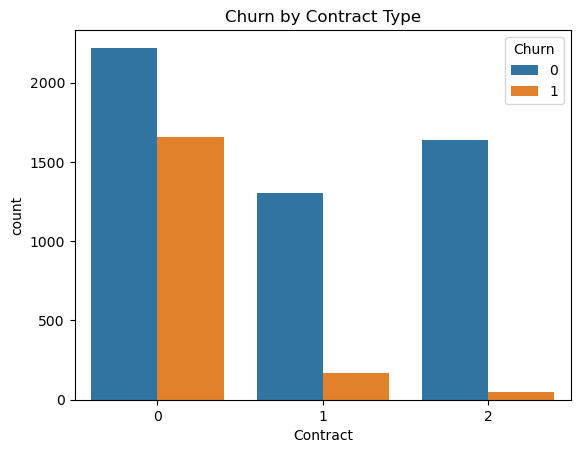

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for Contract vs. Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()



the "Churn" bar is higher for the "Month-to-month" contract type, it suggests that customers with month-to-month contracts are more likely to churn compared to customers with longer-term contracts.

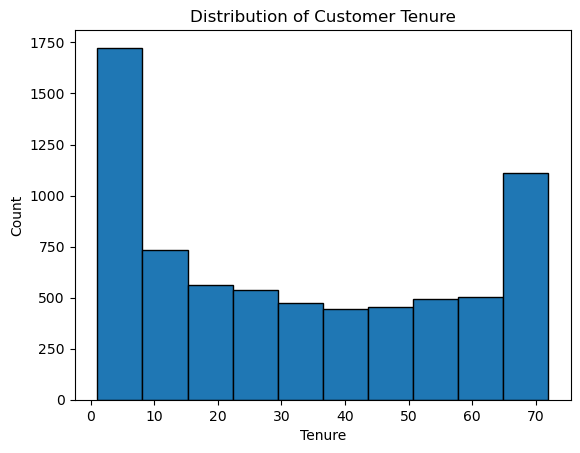

In [44]:
# Visualize the distribution of customer tenure, which is the number of months a customer has been with the company.
plt.hist(df['tenure'], bins=10,edgecolor='k')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')
plt.show()


In [39]:
# Box plot for TotalCharges
# sns.boxplot(x='Churn', y='TotalCharges', data=df)
# plt.title('TotalCharges Distribution by Churn')
# plt.show()

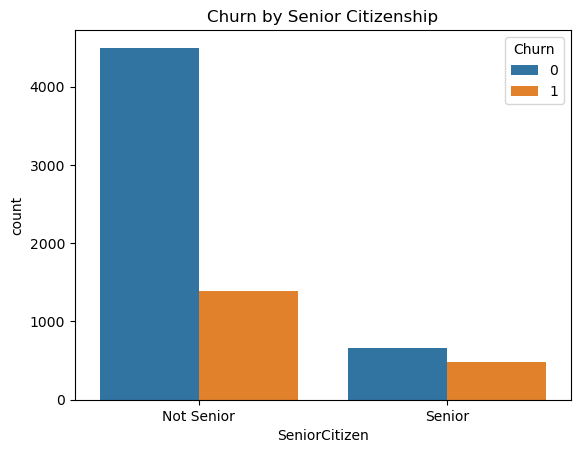

In [40]:
# Visualize the proportion of senior citizens and their relation to churn.
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.title('Churn by Senior Citizenship')
plt.show()


Regression and classification are both supervised machine learning techniques, but they are used for different types of prediction tasks based on the nature of the target variable. Here's when to use regression and classification:

Regression:
Regression is used when the target variable is continuous and numerical. The goal is to predict a value that lies within a specific range. Some examples of regression tasks include predicting stock prices, house prices, temperature, and sales revenue. In regression, the output is a numeric value that can take any value in a given range.

Classification:
Classification is used when the target variable is categorical and the goal is to assign an input to one of several predefined classes. The output of a classification algorithm is a class label. Classification tasks are used for scenarios such as spam detection, image classification, sentiment analysis, and medical diagnosis.

In summary:

Use regression when you're trying to predict a continuous value within a range, such as prices, scores, or quantities.
Use classification when you're trying to categorize inputs into distinct classes or groups, such as binary classes (yes/no) or multi-class categories (e.g., different types of animals).
Remember that the choice between regression and classification depends on the nature of your target variable and the problem you're trying to solve. It's important to understand your data and the goals of your analysis before deciding which technique to use.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the features with higher correlations
selected_features = ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'Partner']

# Define X (features) and y (target)
X = df[selected_features]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7818052594171997


In machine learning, it's often a good practice to standardize or normalize your features before training a model. Standardization involves transforming your features such that they have a mean of 0 and a standard deviation of 1. This can help improve the performance of many machine learning algorithms, as it ensures that all features are on the same scale.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['TotalCharges']  # Assuming TotalCharges represents revenue

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.2128348627880902e-23
R-squared: 1.0
